# SUPPLY CHAIN ANAYSIS WITH MACHINE LEARNING


## *Supply chain prediction is crucial for businesses to optimize their operations, reduce costs, and improve customer satisfaction. Here are some reasons why supply chain prediction is important:*

# Improved Forecasting Accuracy
1. *Demand forecasting*: Predicting demand helps businesses adjust production, inventory, and logistics accordingly.
2. *Inventory optimization*: Accurate forecasting ensures optimal inventory levels, reducing stockouts and overstocking.
3. *Supply chain risk management*: Predictive analytics helps identify potential disruptions, enabling proactive mitigation strategies.

# Enhanced Operational Efficiency
1. *Production planning*: Predictive models optimize production schedules, reducing lead times and increasing productivity.
2. *Logistics and transportation*: Predicting transportation times and costs enables businesses to optimize routes, modes, and carriers.
3. *Warehouse management*: Accurate forecasting ensures optimal warehouse capacity utilization and efficient order fulfillment.

# Better Decision-Making
1. *Data-driven insights*: Predictive analytics provides actionable insights, enabling data-driven decisions.
2. *Scenario planning*: Businesses can simulate different scenarios to evaluate potential outcomes and make informed decisions.
3. *Collaboration and visibility*: Predictive analytics facilitates collaboration among stakeholders, promoting end-to-end supply chain visibility.

# Competitive Advantage
1. *Improved customer satisfaction*: Predictive analytics helps businesses respond quickly to changing customer demands.
2. *Increased agility*: Businesses can adapt rapidly to disruptions, ensuring continuity and minimizing losses.
3. *Cost savings*: Optimized supply chain operations reduce costs, enhancing profitability and competitiveness.

# Real-World Applications
1. *Retail and e-commerce*: Predictive analytics optimizes inventory management, reducing stockouts and overstocking.
2. *Manufacturing*: Predictive models optimize production planning, reducing lead times and increasing productivity.
3. *Logistics and transportation*: Predictive analytics optimizes routes, modes, and carriers, reducing transportation costs and times.

By leveraging predictive analytics, businesses can transform their supply chain operations, achieving improved forecasting accuracy, operational efficiency, and decision-making capabilities.

### * Steps for the Project: *
- Data Understanding:
Load and explore the data to understand its structure, features, and data types.
Identify any potential business problems or objectives.

- Data Cleaning & Preprocessing:
Handle missing values, outliers, and duplicate records.
Convert data types if necessary and normalize/standardize the data.

- Data Merging (if needed):
If supplementary datasets are available, merge them with this one.

- Exploratory Data Analysis (EDA):
Create summary statistics and visualizations to understand data distributions, relationships, and trends.

- Feature Engineering:
Generate new features if required for better model performance.

- Ad Hoc Analysis:
Perform specific analyses like grouping, filtering, and custom calculations to derive meaningful insights.

- Forecasting:
Use machine learning models (e.g., ARIMA, LSTM) to forecast trends (e.g., supply chain demand or costs).

- Machine Learning Modeling:
Apply supervised/unsupervised learning for classification, regression, or clustering tasks.
Evaluate the models with appropriate metrics.

- SQL Integration:
Use SQL to query data and perform operations like joins, aggregations, and filtering.

- Visualization:
Create interactive dashboards using tools like Tableau or Python libraries (Matplotlib, Seaborn, Plotly).
Documentation & Presentation:
Document your process and findings in a well-structured format.

## 1- # Data Understanding:
- Load and explore the data to understand its structure, features, and data types.
- Identify any potential business problems or objectives.

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import mysql.connector
import schedule
import time

# Load the uploaded dataset
file_path = 'supply_chain_data.csv'
supply_chain_data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
supply_chain_data.head(10), supply_chain_data.info()


ModuleNotFoundError: No module named 'fpdf'

### Data Summary:
#### Categorical Columns (object type):
-    Product type, SKU, Customer demographics, Shipping carriers, Supplier name, Location, Inspection results, Transportation modes, Routes.
#### Numerical Columns (float64, int64):
-    Includes Price, Availability, Number of products sold, Revenue generated, Stock levels, Shipping costs, Manufacturing costs, etc.

### Observations:
- There are no missing values in the dataset.
- The dataset is quite comprehensive and includes features relevant to supply chain operations such as:
--     Sales: Revenue generated, Number of products sold.
--     Logistics: Shipping times, Shipping costs, Transportation modes, Routes.
--     Production: Manufacturing costs, Production volumes, Defect rates.




## Step 2-Data Manipulation Techniques  with python step by step *
We use Pandas to clean, transform, and analyze supply chain data.

##### Key Techniques:
- Cleaning Data – Handling missing values, duplicates, and incorrect formats.(Convert data types if necessary and normalize/standardize the data.)
- Filtering & Sorting – Extracting specific data based on conditions.
- Grouping & Aggregation – Summarizing key metrics.
-  Feature Engineering – Creating new insights from raw data.
-  Pivoting & Reshaping – Converting data structures for better analysis.* 

### 1.1 Cleaning Data

In [160]:
# Data Cleaning & Preprocessing

# Standardize column names (remove spaces, convert to lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for duplicates and remove them if any
df_cleaned = df.drop_duplicates()

# Handle missing values by filling them with the column mean (though none seem to be missing)
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

# Check data types and convert where necessary
# For example, converting "Lead time" column to numeric if it's a string or erroneous type
df_cleaned["lead_time"] = pd.to_numeric(df_cleaned["lead_time"], errors='coerce')

# After cleaning, let's check the dataset info again
df_cleaned_info = df_cleaned.info()
df_cleaned_head = df_cleaned.head()

df_cleaned_info, df_cleaned_head



<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 
 14  location                 10

/var/folders/_k/31bdqfl15sx7lg5rdhpc97q00000gn/T/ipykernel_1648/3119779072.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.fillna(df_cleaned.mean(), inplace=True)


(None,
   product_type   sku      price  availability  number_of_products_sold  \
 0     haircare  SKU0  69.808006            55                      802   
 1     skincare  SKU1  14.843523            95                      736   
 2     haircare  SKU2  11.319683            34                        8   
 3     skincare  SKU3  61.163343            68                       83   
 4     skincare  SKU4   4.805496            26                      871   
 
    revenue_generated customer_demographics  stock_levels  lead_times  \
 0        8661.996792            Non-binary            58           7   
 1        7460.900065                Female            53          30   
 2        9577.749626               Unknown             1          10   
 3        7766.836426            Non-binary            23          13   
 4        2686.505152            Non-binary             5           3   
 
    order_quantities  ...  location lead_time  production_volumes  \
 0                96  ...    Mum

#### 1.2 Filtering & Sorting Data

In [ ]:
# Filtering: Get all shipments that used "Air" transportation mode
air_shipments = df[df["transportation_modes"] == "Air"]

# Sorting: Highest shipping costs first
high_shipping_costs = df.sort_values(by="shipping_costs", ascending=False)

# Filtering & Sorting Combined: Get top 5 most expensive Air shipments
top_air_shipments = df[df["transportation_modes"] == "Air"].sort_values(by="shipping_costs", ascending=False).head(5)

print(top_air_shipments)


## 1.3 Grouping & Aggregation

In [164]:
# Average shipping costs by transportation mode
avg_shipping_cost = df.groupby("transportation_modes")["shipping_costs"].mean()

# Total revenue generated by product type
total_revenue = df.groupby("product_type")["revenue_generated"].sum()

# Number of defective items by supplier
defect_count = df.groupby("supplier_name")["defect_rates"].sum()

print(avg_shipping_cost, total_revenue, defect_count)


transportation_modes
Air     6.017839
Rail    5.469098
Road    5.542115
Sea     4.970294
Name: shipping_costs, dtype: float64 product_type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: revenue_generated, dtype: float64 supplier_name
Supplier 1    48.698002
Supplier 2    51.980503
Supplier 3    36.986790
Supplier 4    42.073153
Supplier 5    47.977350
Name: defect_rates, dtype: float64


## Data Transformation (Additional)

Data transformation helps in restructuring or deriving new features from existing data.

In [178]:
# Pivot Table: Average Shipping Costs by Transportation Mode and Supplier
pivot_table = df.pivot_table(values="shipping_costs", index="supplier_name", columns="transportation_modes", aggfunc="mean")

# Reshape Data: Convert column format into row format using Melt
reshaped_df = df.melt(id_vars=["supplier_name"], value_vars=["shipping_costs", "manufacturing_costs", "revenue_generated"], var_name="cost_type", value_name="amount")

print(pivot_table)
print(reshaped_df.head())

transportation_modes       Air      Rail      Road       Sea
supplier_name                                               
Supplier 1            5.100766  6.740622  5.528809  5.619347
Supplier 2            5.483922  5.828609  6.968186  5.111636
Supplier 3            6.496325  4.806790  5.605754  3.456068
Supplier 4            8.593100  6.664546  4.182966  4.588999
Supplier 5            6.837363  3.030078  6.830842  6.910690
  supplier_name       cost_type    amount
0    Supplier 3  shipping_costs  2.956572
1    Supplier 3  shipping_costs  9.716575
2    Supplier 1  shipping_costs  8.054479
3    Supplier 5  shipping_costs  1.729569
4    Supplier 1  shipping_costs  3.890548


#


### * Data Merging (if needed): 
- If supplementary datasets are available, merge them with this one. Since we do not have another data set. We will not do merge.

### ** But What Does "Merge" Mean in Data Context?
Merging is the process of combining multiple datasets into one based on a common column or key. Think of it as joining two tables in Excel or SQL, where each table contains related but different information.

Example Scenario (with Supply Chain Data):

Let’s say:

You have Dataset A with details like product name, supplier ID, and shipping costs.
You have Dataset B with details about supplier ID and supplier ratings.
If you merge these two datasets on the supplier ID column, you create a single dataset that contains product details, shipping costs, and supplier ratings.

## STEP 3 # Exploratory Data Analysis (EDA):
- Now, I will proceed with Exploratory Data Analysis (EDA). This will include summary statistics and visualizations to understand data distributions, relationships, and trends.

- Let's start by generating summary statistics and visualizations for some key column
- Create summary statistics and visualizations to understand data distributions, relationships, and trends.


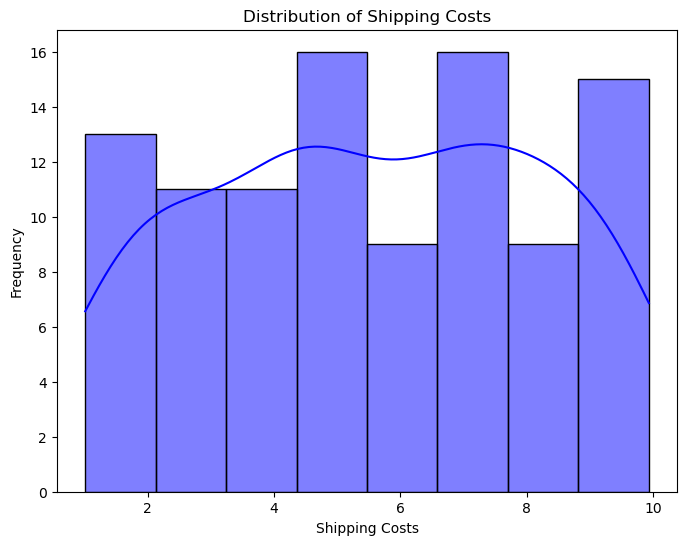

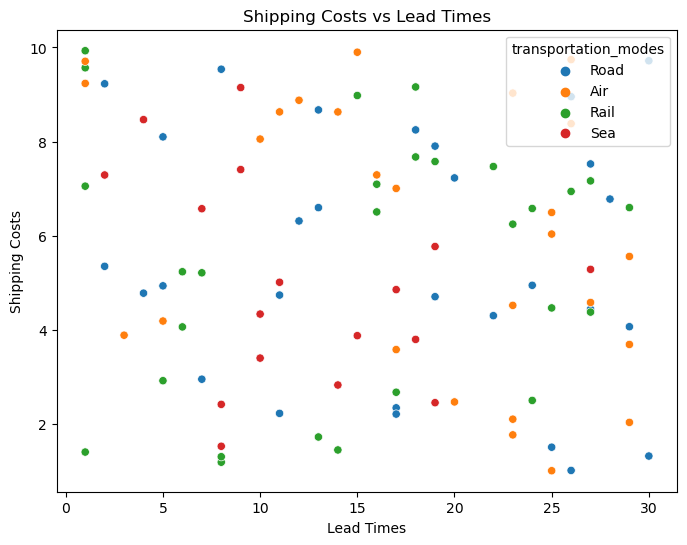

,price,availability,number_of_products_sold,revenue_generated,stock_levels,lead_times,order_quantities,shipping_times,shipping_costs,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,defect_rates,costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORATORY DATA ANALYSIS 

#Summary statistics for numerical columns
numerical_summary = df_cleaned.describe()

# Visualize distribution of Shipping Costs
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['shipping_costs'], kde=True, color='blue')
plt.title('Distribution of Shipping Costs')
plt.xlabel('Shipping Costs')
plt.ylabel('Frequency')
plt.savefig('shipping_costs_distribution.png')
plt.show()

# Visualize relationship between Shipping Costs and Lead Times
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['lead_times'], y=df_cleaned['shipping_costs'], hue=df_cleaned['transportation_modes'])
plt.title('Shipping Costs vs Lead Times')
plt.xlabel('Lead Times')
plt.ylabel('Shipping Costs')
plt.savefig('shipping_costs_vs_lead_times.png')
plt.show()

numerical_summary



#### The summary statistics( FOR EDA) for the numerical columns have been generated. Key observations from the statistics include:

- Shipping Costs: The mean is around $5.55, with a standard deviation of $2.65, indicating some variation in shipping costs.

- Lead Times: The average lead time is 17 days, with a wide range from 1 to 30 days.

- Manufacturing Costs: The mean is $47.27, but the variation is significant (standard deviation of $28.98).

- Defect Rates: The average defect rate is 2.28%, with values ranging from near zero to just under 5%.

#### The visualizations provide insight into the following:

- Shipping Costs Distribution: Most shipping costs are clustered in the lower range, but there is a noticeable tail towards higher costs.

- Shipping Costs vs Lead Times: A slight positive trend can be observed, meaning that higher lead times are associated with slightly higher shipping costs.

### Feature Engineering and Ad-Hoc 

#### Feature Engineering: Let's create new features such as cost per product, profitability score, and identify shipments with high shipping costs.
#### Ad-hoc Analysis: We will perform grouping and aggregations to gain further insights.

In [ ]:
# Feature Engineering: Creating new features
df_cleaned['cost_per_product'] = df_cleaned['shipping_costs'] / df_cleaned['number_of_products_sold']
df_cleaned['profitability_score'] = df_cleaned['revenue_generated'] - df_cleaned['shipping_costs'] - df_cleaned['manufacturing_costs']
df_cleaned['high_shipping_cost'] = df_cleaned['shipping_costs'] > df_cleaned['shipping_costs'].mean()

# Display the new features
df_cleaned[['product_type', 'sku', 'shipping_costs', 'number_of_products_sold', 'cost_per_product', 'profitability_score', 'high_shipping_cost']].head()

# Ad-hoc Analysis: Grouping and aggregation
# Average shipping costs by transportation mode
avg_shipping_cost_by_mode = df_cleaned.groupby('transportation_modes')['shipping_costs'].mean()

# Total revenue by product type
total_revenue_by_product = df_cleaned.groupby('product_type')['revenue_generated'].sum()

# Number of defective products by supplier
defective_products_by_supplier = df_cleaned.groupby('supplier_name')['defect_rates'].sum()

avg_shipping_cost_by_mode, total_revenue_by_product, defective_products_by_supplier



### NOTE: ( Here are the results from the ad-hoc analysis:

#### Average Shipping Costs by Transportation Mode:
- Air: $6.02

- Rail: $5.47

- Road: $5.54

- Sea: $4.97 Air transport has the highest average shipping costs, while sea transport has the lowest.

#### Total Revenue by Product Type:

- Cosmetics: $161,521.27

- Haircare: $174,455.39

- Skincare: $241,628.16 Skincare generates the highest revenue, followed by haircare and cosmetics.

#### Defective Products by Supplier:
- Supplier 1: 48.70%
- Supplier 2: 51.98%
- Supplier 3: 36.99%
- Supplier 4: 42.07%
- Supplier 5: 47.98% Supplier 2 has the highest defect rate, while Supplier 3 has the lowest.) 

## 2.3 Handling Categorical Variables (Encoding)

## STEP 5- Function: Forecasting shipping costs using Linear Regression

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Forecasting shipping costs using Linear Regression
def forecast_shipping_cost(df):
    X = df[['lead_times']]  # Predictor variable: Lead times
    y = df['shipping_costs']  # Target variable: Shipping costs
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Predict shipping cost for a 20-day lead time
    future_cost = model.predict([[20]])[0]
    
    return mae, r2, future_cost

# Run the forecasting function
mae, r2, future_cost = forecast_shipping_cost(df_cleaned)
mae, r2, future_cost


/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(2.1928595318386805, 0.009033867499928516, 5.529164452683936)

#### Let's proceed with the visualizations to explore the relationships in the data further. I will create:

A correlation heatmap to visualize the relationships between numerical features.
A bar plot showing the total revenue by product type for a clearer comparison.

/var/folders/_k/31bdqfl15sx7lg5rdhpc97q00000gn/T/ipykernel_1648/3320998118.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


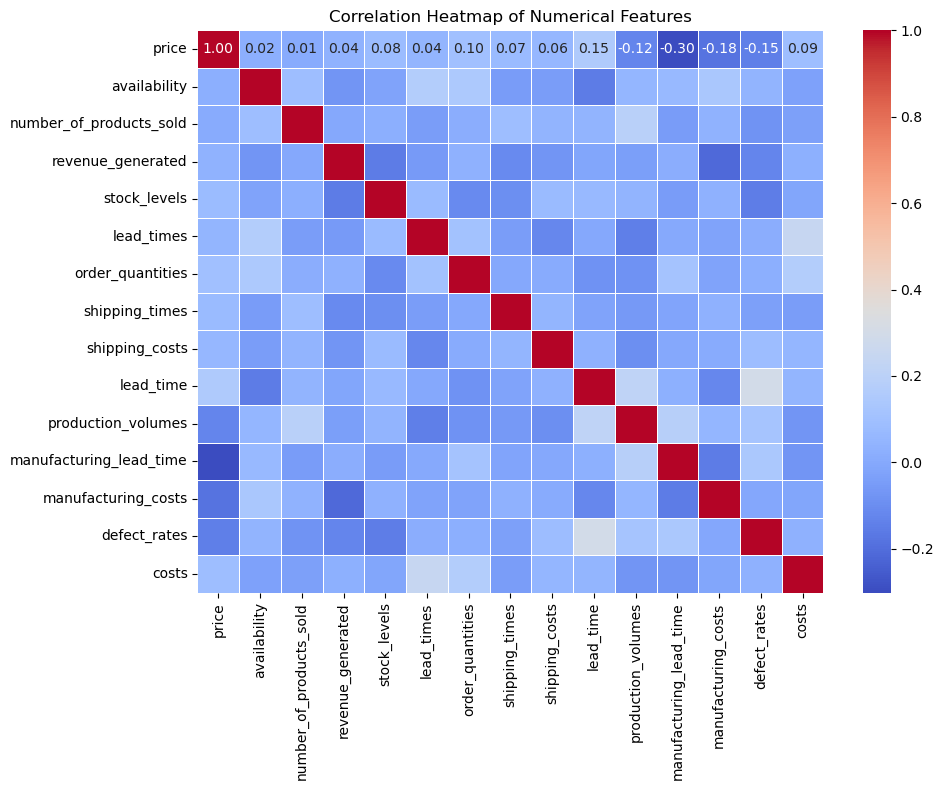

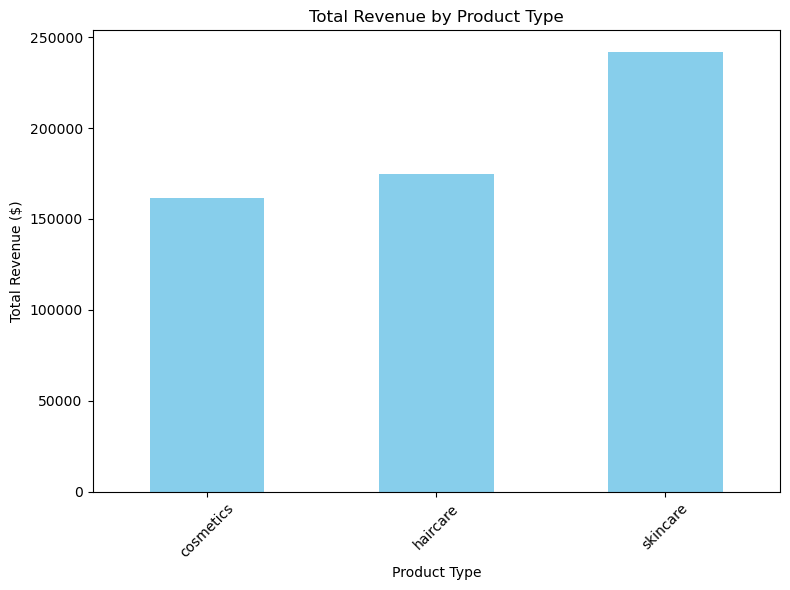

In [207]:
#  Correlation Heatmap to see relationships between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Visualization 2: Bar plot of Total Revenue by Product Type
plt.figure(figsize=(8, 6))
total_revenue_by_product.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_revenue_by_product.png')
plt.show()


- NOTE FOR The visualizations are complete:

- Correlation Heatmap: This heatmap shows the relationships between numerical features. It helps identify strong positive or negative correlations (e.g., shipping costs and production volumes, etc.).
- Total Revenue by Product Type: This bar plot clearly compares the total revenue generated by each product type. Skincare leads in total revenue, followed by haircare and cosmetics.

### FORECASTING WITH ARITMA

Forecasted values: 100    6.047164
101    5.498249
102    5.561868
103    5.554495
104    5.555349
105    5.555250
106    5.555262
107    5.555260
108    5.555261
109    5.555261
Name: predicted_mean, dtype: float64


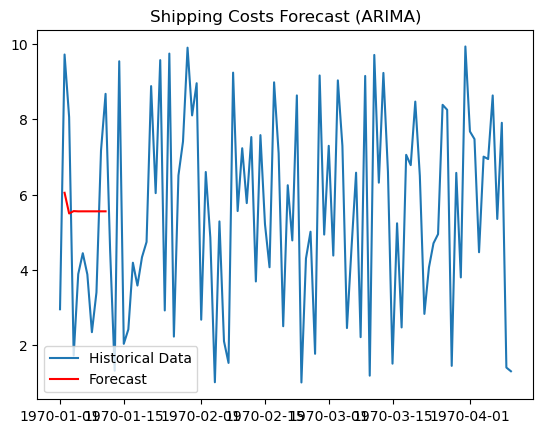

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Fit ARIMA model (with p=1, d=1, q=1 as an example)
model = ARIMA(df['shipping_costs'], order=(1, 1, 1))
model_fit = model.fit()

# Make forecasts
forecast = model_fit.forecast(steps=10)  # Forecasting the next 10 time points
print("Forecasted values:", forecast)

# Plot the forecast
plt.plot(df.index, df['shipping_costs'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=11, freq='D')[1:], forecast, color='red', label='Forecast')
plt.title('Shipping Costs Forecast (ARIMA)')
plt.legend()
plt.show()

 # autoregressive integrated moving average
    # statistical model that captures pattern in time series data.

### STEP 6-Function: Automate script execution

In [229]:
import schedule
import time

# Automate the complete process
def run_automation():
    # Data cleaning and preprocessing
    df = clean_data()
    
    # Forecasting Shipping Costs
    mae, r2, future_cost = forecast_shipping_cost(df)
    print(f'MAE: {mae}, R²: {r2}, Predicted Cost for 20-day Lead Time: {future_cost}')

    # Visualizations
    create_visualizations(df)
    
    # SQL Queries (optional)
    run_sql_queries()

    # Create PDF report
    shipping_summary = df.groupby("transportation_modes")["shipping_costs"].sum()
    defect_rates = df.groupby("supplier_name")["defect_rates"].sum()
    cost_effective_routes = df.groupby("routes")["shipping_costs"].mean()
    create_pdf_report(shipping_summary, defect_rates, cost_effective_routes)
    
    print("Automation complete! Report generated: Supply_Chain_Report.pdf")

# Step 7: Schedule the automation to run daily at 8:00 AM
schedule.every().day.at("08:00").do(run_automation)

# Step 8: Keep the script running to execute the scheduled task
if __name__ == "__main__":
    run_automation()  # Run immediately for testing
    while True:
        schedule.run_pending()
        time.sleep(60)  # Wait 60 seconds before checking again



ModuleNotFoundError: No module named 'schedule'